In [34]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt



In [68]:
df = pd.read_csv('HRDataset.csv', header=0)
print(len(df))
df.head()

311


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506.0,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437.0,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955.0,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991.0,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,NaN,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      306 non-null    float64
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [37]:
df.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,306.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69019.022876,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25289.100589,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55463.250000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62734.500000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,71939.500000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [38]:
col = list(df.columns)

for c in col:
  x = df[c].isnull().values.any()
  if(x == True):
    print(c)

Salary
DateofTermination
ManagerID


In [39]:
mean = df['Salary'].mean()
df['Salary'].replace(np.nan, mean,inplace  = True)

In [40]:
df = df.drop(['ManagerName','ManagerID'],axis=1)

df['DateofTermination'] = df['DateofTermination'].dropna()
df.dropna(inplace=True)

df.drop_duplicates(inplace= True)
df.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,EmploymentStatus,Department,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437.000000,...,Voluntarily Terminated,IT/IS,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955.000000,...,Voluntarily Terminated,Production,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,69019.022876,...,Voluntarily Terminated,Production,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2
10,"Baczenski, Rachael",10252,1,1,0,5,5,3,1,54670.000000,...,Voluntarily Terminated,Production,Diversity Job Fair,Fully Meets,4.20,4,0,1/30/2016,0,12
11,"Barbara, Thomas",10242,1,1,1,5,5,3,1,47211.000000,...,Voluntarily Terminated,Production,Diversity Job Fair,Fully Meets,4.20,3,0,5/6/2016,0,15


In [65]:
col = list(df.columns)
for c in col:
  x = df[c].isnull().values.any()
  if(x == True):
    print(c)

Salary
DateofTermination
ManagerID


In [42]:
df['MarriedID'].value_counts()

0    57
1    47
Name: MarriedID, dtype: int64

In [43]:
df['MaritalStatusID'].value_counts()
df['MaritalDesc'].value_counts()

Married      47
Single       36
Divorced     16
Widowed       4
Separated     1
Name: MaritalDesc, dtype: int64

In [44]:
EmpStatus= df[['EmpStatusID','EmploymentStatus']]
EmpStatus.head(10)

,EmpStatusID,EmploymentStatus
1,5,Voluntarily Terminated
2,5,Voluntarily Terminated
4,5,Voluntarily Terminated
10,5,Voluntarily Terminated
11,5,Voluntarily Terminated
14,5,Voluntarily Terminated
15,4,Terminated for Cause
18,4,Terminated for Cause
24,5,Voluntarily Terminated
25,4,Terminated for Cause


In [45]:
df['DeptID'].value_counts()
df['Department'].value_counts()

Production              83
IT/IS                   10
Sales                    5
Software Engineering     4
Admin Offices            2
Name: Department, dtype: int64

In [46]:
df['CitizenDesc'].value_counts()

US Citizen             96
Eligible NonCitizen     5
Non-Citizen             3
Name: CitizenDesc, dtype: int64

In [47]:
from datetime import datetime
df['DateofHire'] = pd.to_datetime(df['DateofHire'], format='%m/%d/%Y')
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], format='%m/%d/%Y')
df[['DateofHire','DateofTermination']]

,DateofHire,DateofTermination
1,2015-03-30,2016-06-16
2,2011-07-05,2012-09-24
4,2011-07-11,2016-09-06
10,2011-01-10,2017-01-12
11,2012-04-02,2016-09-19
...,...,...
301,2011-05-16,2015-09-07
302,2011-01-10,2012-05-14
303,2012-01-09,2015-06-27
304,2013-01-07,2016-02-21


In [48]:
df['Department'].unique()

array(['IT/IS', 'Production       ', 'Sales', 'Software Engineering',
       'Admin Offices'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='Department'>

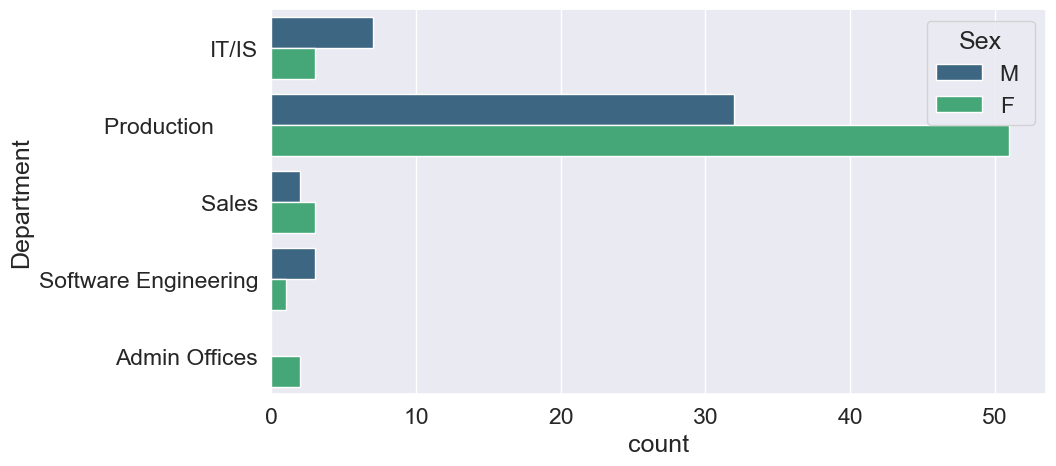

In [49]:
plt.figure(figsize=(10,5))
sns.countplot(y='Department', data=df, hue= 'Sex',  palette='viridis')

<AxesSubplot:xlabel='Sex', ylabel='count'>

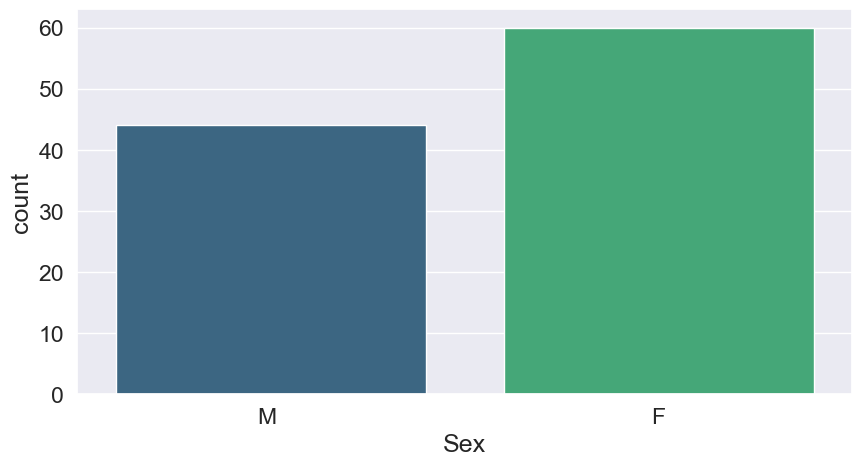

In [50]:
plt.figure(figsize=(10,5))
sns.countplot(x='Sex', data=df, palette='viridis')

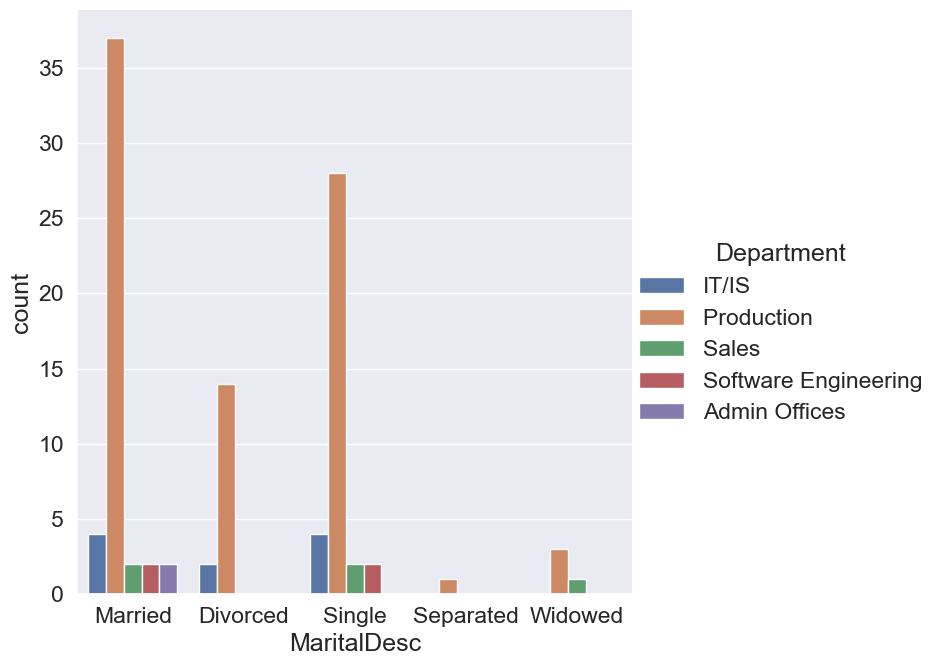

In [51]:
sns.catplot(x='MaritalDesc', hue='Department', data=df, kind="count",height=7, aspect=1)

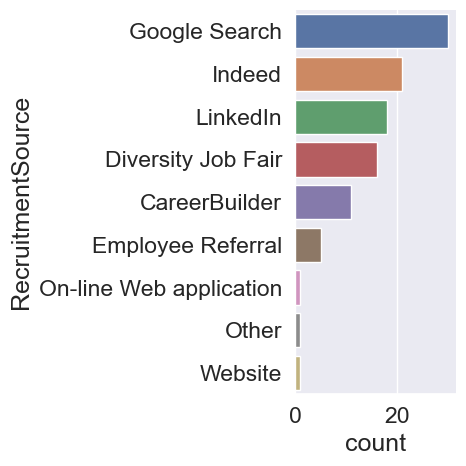

In [52]:
sns.catplot(y='RecruitmentSource', kind='count', order=df.groupby('RecruitmentSource')['EmpID'].count().sort_values(ascending=False).index, data=df)

<AxesSubplot:xlabel='Salary', ylabel='Density'>

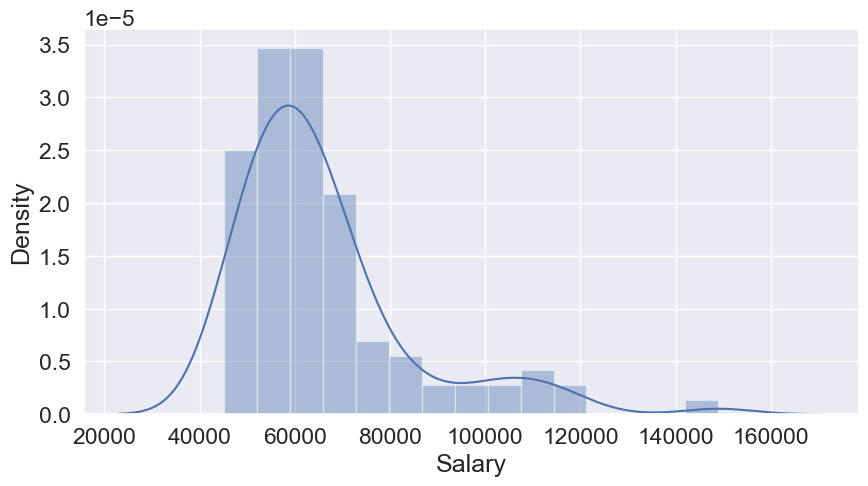

In [53]:
plt.figure(figsize=(10,5))
sns.distplot(df['Salary'])

In [54]:
cols = ['Salary','EngagementSurvey','EmpSatisfaction','SpecialProjectsCount','Absences']

In [55]:
for i in cols:
    print(i)
    print("min: " + str(np.around(df[i].min(),2)))
    print("max: " + str(np.around(df[i].max(),2)))
    print('-----------------------')

Salary
min: 45115.0
max: 148999.0
-----------------------
EngagementSurvey
min: 2.0
max: 5.0
-----------------------
EmpSatisfaction
min: 2
max: 5
-----------------------
SpecialProjectsCount
min: 0
max: 7
-----------------------
Absences
min: 1
max: 20
-----------------------


In [56]:
df.DateofHire = pd.to_datetime(df.DateofHire)
df['year'] = df.DateofHire.dt.year
years = df['year'].value_counts()

df_tot = {'year': years.index.tolist(),'total' : [" " for x in range(len(years))]}
df_tot = pd.DataFrame(df_tot)

df_tot.set_index('year', inplace = True)
df_tot['total'] = list(years.values)
df_tot['year'] = list(years.index)
df_tot

,total,year
year,,
2011,59,2011
2012,16,2012
2015,7,2015
2014,7,2014
2013,7,2013
2010,3,2010
2009,3,2009
2007,1,2007
2008,1,2008


Text(0.5, 1.0, 'Total numbers of employees from 2007 - 2015')

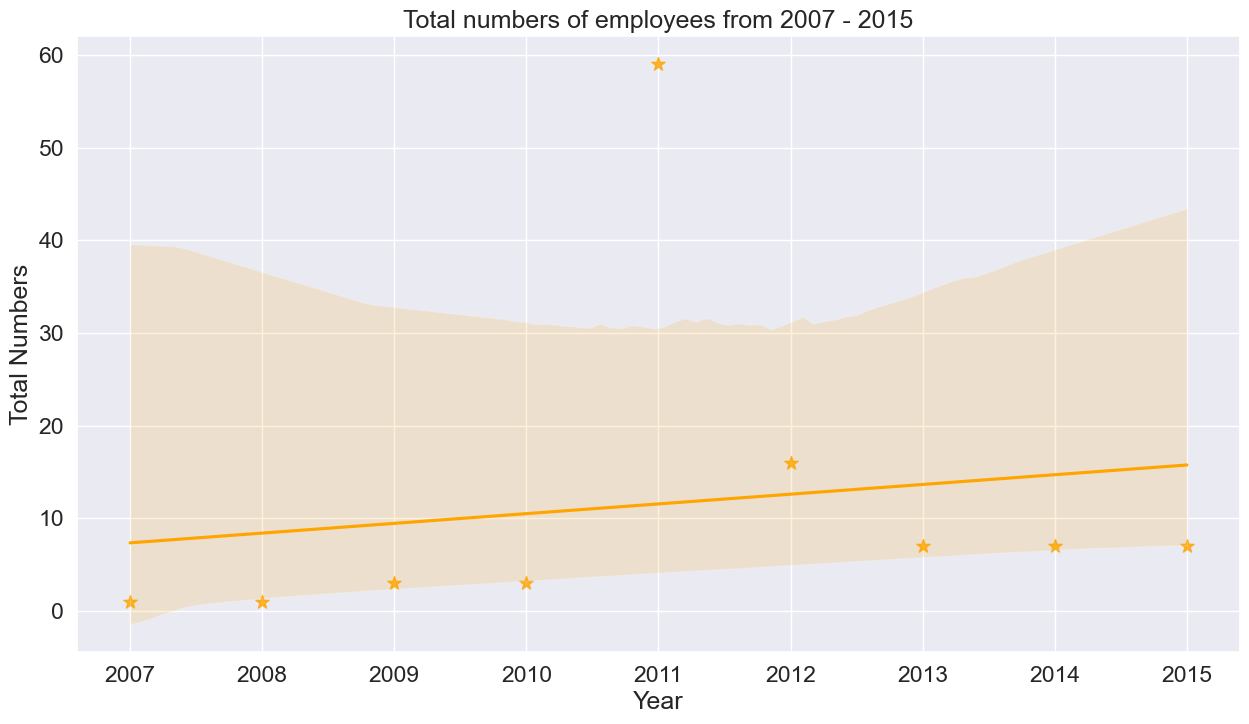

In [57]:
plt.figure(figsize=(15, 8))

sns.set(font_scale=1.5)

ax = sns.regplot(x='year', y='total', data=df_tot, color='orange', marker='*', scatter_kws={'s': 100})
ax.set(xlabel='Year', ylabel='Total Numbers')
ax.set_title('Total numbers of employees from 2007 - 2015')